<a href="https://colab.research.google.com/github/Rohan171819/Deep_Learning_Projects./blob/main/Dogs_vs_Cats_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:51<00:00, 23.1MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.3MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip_ref.extractall("/content")
zip_ref.close()

In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout

In [5]:
# Generators...
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize...
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [15]:
# CNN MOdel...
model=Sequential()
model.add(Conv2D(16,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding="valid",strides=2))
model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding="valid",strides=2))
model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding="valid",strides=2))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                      

In [17]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [18]:
history=model.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/20
625/625 [==============================] - 57s 83ms/step - loss: 0.6598 - accuracy: 0.6547 - val_loss: 0.5631 - val_accuracy: 0.6988
Epoch 2/20
625/625 [==============================] - 54s 86ms/step - loss: 0.4661 - accuracy: 0.7837 - val_loss: 0.4374 - val_accuracy: 0.8018
Epoch 3/20
625/625 [==============================] - 51s 80ms/step - loss: 0.3757 - accuracy: 0.8345 - val_loss: 0.3802 - val_accuracy: 0.8288
Epoch 4/20
625/625 [==============================] - 50s 80ms/step - loss: 0.2835 - accuracy: 0.8795 - val_loss: 0.3255 - val_accuracy: 0.8570
Epoch 5/20
625/625 [==============================] - 50s 79ms/step - loss: 0.2027 - accuracy: 0.9189 - val_loss: 0.3313 - val_accuracy: 0.8626
Epoch 6/20
625/625 [==============================] - 51s 80ms/step - loss: 0.1287 - accuracy: 0.9508 - val_loss: 0.4776 - val_accuracy: 0.8374
Epoch 7/20
625/625 [==============================] - 52s 83ms/step - loss: 0.0882 - accuracy: 0.9681 - val_loss: 0.3566 - val_accuracy:

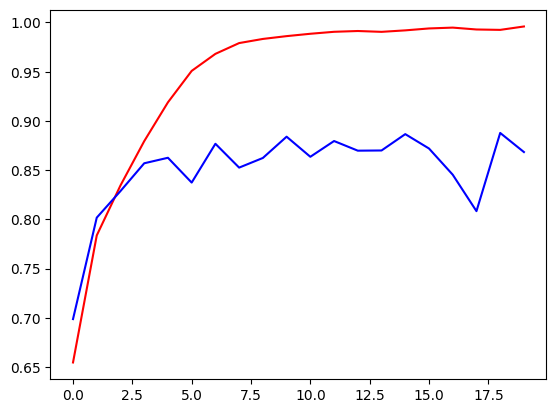

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color="red",label="train")
plt.plot(history.history["val_accuracy"],color="blue",label="validation")
plt.show()

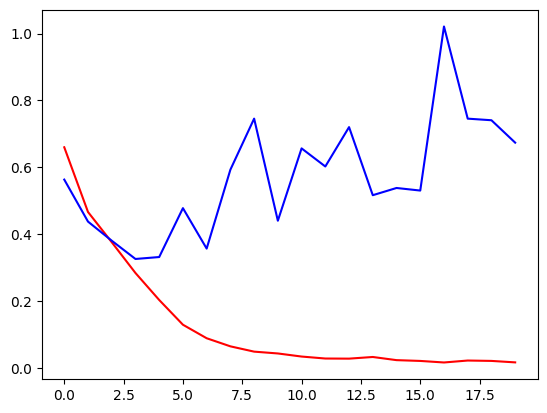

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],color="red",label="train")
plt.plot(history.history["val_loss"],color="blue",label="validation")
plt.show()